ModuleNotFoundError: No module named 'lab_black'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE


In [2]:
df = pd.read_csv("mushrooms.csv")


In [4]:
dict_class = {"e": "edible", "p": "poisonous"}
dict_cap_shape = {
    "b": "bell",
    "c": "conical",
    "x": "convex",
    "f": "flat",
    "k": "knobbed",
    "s": "sunken",
}

dict_cap_surface = {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"}

dict_cap_color = {
    "n": "brown",
    "b": "buff",
    "c": "cinnamon",
    "g": "gray",
    "r": "green",
    "p": "pink",
    "u": "purple",
    "e": "red",
    "w": "white",
    "y": "yellow",
}

dict_bruises = {"t": "bruises", "f": "no"}

dict_odor = {
    "a": "almond",
    "l": "anise",
    "c": "creosote",
    "y": "fishy",
    "f": "foul",
    "m": "musty",
    "n": "none",
    "p": "pungent",
    "s": "spicy",
}

dict_gill_attachment = {"a": "attached", "d": "descending", "f": "free", "n": "notched"}

dict_gill_spacing = {"c": "close", "w": "crowded", "d": "distant"}

dict_gill_size = {"b": "broad", "n": "narrow"}

dict_gill_color = {
    "k": "black",
    "n": "brown",
    "b": "buff",
    "h": "chocolate",
    "g": "gray",
    "r": "green",
    "o": "orange",
    "p": "pink",
    "u": "purple",
    "e": "red",
    "w": "white",
    "y": "yellow",
}

dict_stalk_shape = {"e": "enlarging", "t": "tapering"}

dict_stalk_root = {
    "b": "bulbous",
    "c": "club",
    "u": "cup",
    "e": "equal",
    "z": "rhizomorphs",
    "r": "rooted",
    "?": pd.NA,
}

dict_stalk_surface_above_ring = {
    "f": "fibrous",
    "y": "scaly",
    "k": "silky",
    "s": "smooth",
}

dict_stalk_surface_below_ring = {
    "f": "fibrous",
    "y": "scaly",
    "k": "silky",
    "s": "smooth",
}

dict_stalk_color_above_ring = {
    "n": "brown",
    "b": "buff",
    "c": "cinnamon",
    "g": "gray",
    "o": "orange",
    "p": "pink",
    "e": "red",
    "w": "white",
    "y": "yellow",
}

dict_stalk_color_below_ring = {
    "n": "brown",
    "b": "buff",
    "c": "cinnamon",
    "g": "gray",
    "o": "orange",
    "p": "pink",
    "e": "red",
    "w": "white",
    "y": "yellow",
}

dict_veil_type = {"p": "partial", "u": "universal"}

dict_veil_color = {"n": "brown", "o": "orange", "w": "white", "y": "yellow"}

dict_ring_number = {"n": "none", "o": "one", "t": "two"}

dict_ring_type = {
    "c": "cobwebby",
    "e": "evanescent",
    "f": "flaring",
    "l": "large",
    "n": "none",
    "p": "pendant",
    "s": "sheathing",
    "z": "zone",
}

dict_spore_print_color = {
    "k": "black",
    "n": "brown",
    "b": "buff",
    "h": "chocolate",
    "r": "green",
    "o": "orange",
    "u": "purple",
    "w": "white",
    "y": "yellow",
}

dict_population = {
    "a": "abundant",
    "n": "numerous",
    "s": "scattered",
    "v": "several",
    "y": "solitary",
}

dict_habitat = {
    "g": "grasses",
    "l": "leaves",
    "m": "meadows",
    "p": "paths",
    "u": "urban",
    "w": "waste",
    "d": "woods",
}

master_dict = {
    "class": dict_class,
    "cap-shape": dict_cap_shape,
    "cap-surface": dict_cap_surface,
    "cap-color": dict_cap_color,
    "bruises": dict_bruises,
    "odor": dict_odor,
    "gill-attachment": dict_gill_attachment,
    "gill-spacing": dict_gill_spacing,
    "gill-size": dict_gill_size,
    "gill-color": dict_gill_color,
    "stalk-shape": dict_stalk_shape,
    "stalk-root": dict_stalk_root,
    "stalk-surface-above-ring": dict_stalk_surface_above_ring,
    "stalk-surface-below-ring": dict_stalk_surface_below_ring,
    "stalk-color-above-ring": dict_stalk_color_above_ring,
    "stalk-color-below-ring": dict_stalk_color_below_ring,
    "veil-type": dict_veil_type,
    "veil-color": dict_veil_color,
    "ring-number": dict_ring_number,
    "ring-type": dict_ring_type,
    "spore-print-color": dict_spore_print_color,
    "population": dict_population,
    "habitat": dict_habitat,
}


In [5]:
for c in df.columns:
    df["{}".format(c)] = df["{}".format(c)].map(master_dict["{}".format(c)])
#    print(c)
#    print(df['{}'.format(c)].value_counts())


In [6]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [7]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,7784,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,5,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df.drop("odor", 1, inplace=True)
df.drop("spore-print-color", 1, inplace=True)


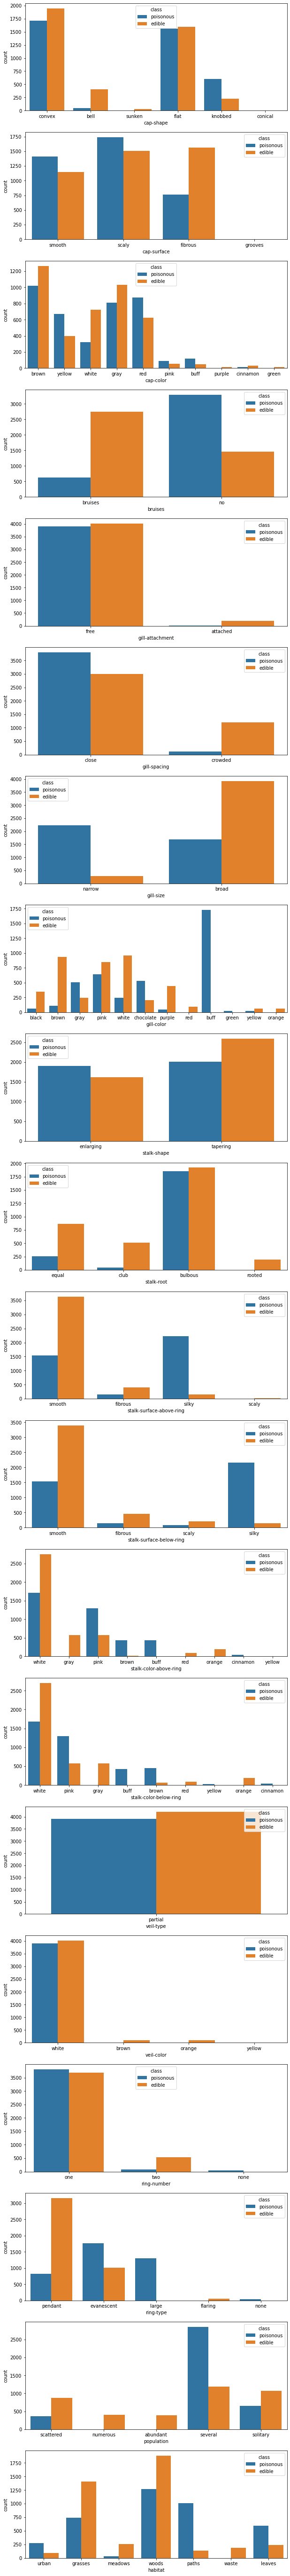

In [12]:
fig, ax = plt.subplots(len(df.columns) - 1, 1, figsize=(10, 100))
for c, i in zip(df.columns[1:], range(len(df.columns))):
    sns.countplot(x="{}".format(c), hue="class", data=df, ax=ax[i])


In [8]:
# Logistic Regression


In [13]:
# Define predictor variables and response variable
# No scaling needed as all variables are one hot encoded
X = pd.get_dummies(df.iloc[:, 1:])
y = (df["class"] == "edible").astype(np.int)


In [16]:
# Split apart into training and testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)


In [22]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [23]:
# Predict First Value
log_reg.predict(
    X_train.iloc[
        0,
    ].values.reshape(1, -1)
)


array([1])

In [24]:
score = log_reg.score(X_test, y_test)
print(score)


0.9975384615384615


Text(0.5, 1.0, 'Accuracy Score: 0.9975384615384615')

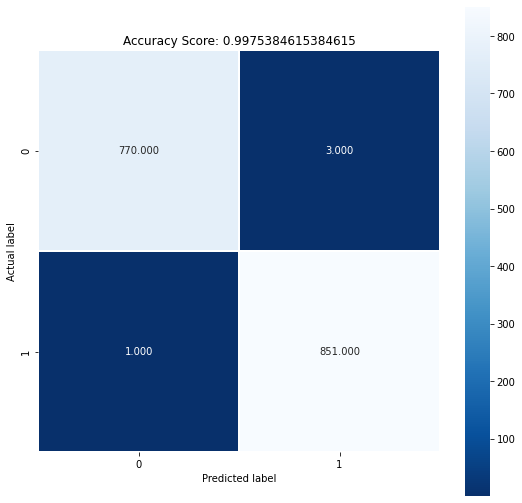

In [25]:
predictions = log_reg.predict(X_test)
plt.figure(figsize=(9, 9))
sns.heatmap(
    metrics.confusion_matrix(y_test, predictions),
    annot=True,
    fmt=".3f",
    linewidths=0.5,
    square=True,
    cmap="Blues_r",
)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Accuracy Score: {0}".format(score))


In [27]:
selector = RFE(log_reg, n_features_to_select=1)
selector = selector.fit(X_train, y_train)


In [28]:
feature_ranks_df = pd.DataFrame(
    data=X_train.columns, index=selector.ranking_, columns=["feature"]
)


In [35]:
feature_ranks_df.sort_index(ascending=True).head(20)


,feature
1,gill-color_buff
2,ring-type_large
3,stalk-color-below-ring_cinnamon
4,stalk-color-below-ring_yellow
5,habitat_urban
6,stalk-root_bulbous
7,habitat_grasses
8,habitat_meadows
9,gill-size_narrow
10,stalk-surface-above-ring_silky
